### Preprocessing

In [69]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale

In [12]:
# import data
from sklearn.datasets import load_boston
Boston_data = load_boston()

In [19]:
Boston = pd.DataFrame(Boston_data.data)
Boston.columns = Boston_data.feature_names
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
Boston = pd.get_dummies(Boston, columns =['CHAS'], drop_first=True)

In [27]:
Boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0


In [28]:
X = Boston.drop(columns='CRIM')
y = Boston['CRIM']

### 10.a. Best subset selection, lasso regression, ridge regression and principal components regression on Boston dataset

**Lasso regression**

In [77]:
from sklearn.linear_model import Lasso, LassoCV
import warnings
warnings.filterwarnings('ignore')

In [78]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [79]:
lasso = Lasso(normalize = True)
coefs = []

for k in lambdas:
    lassolm = lasso.set_params(alpha = k).fit(X, y)
    coefs.append(lassolm.coef_)
    
np.shape(coefs)

(100, 12)

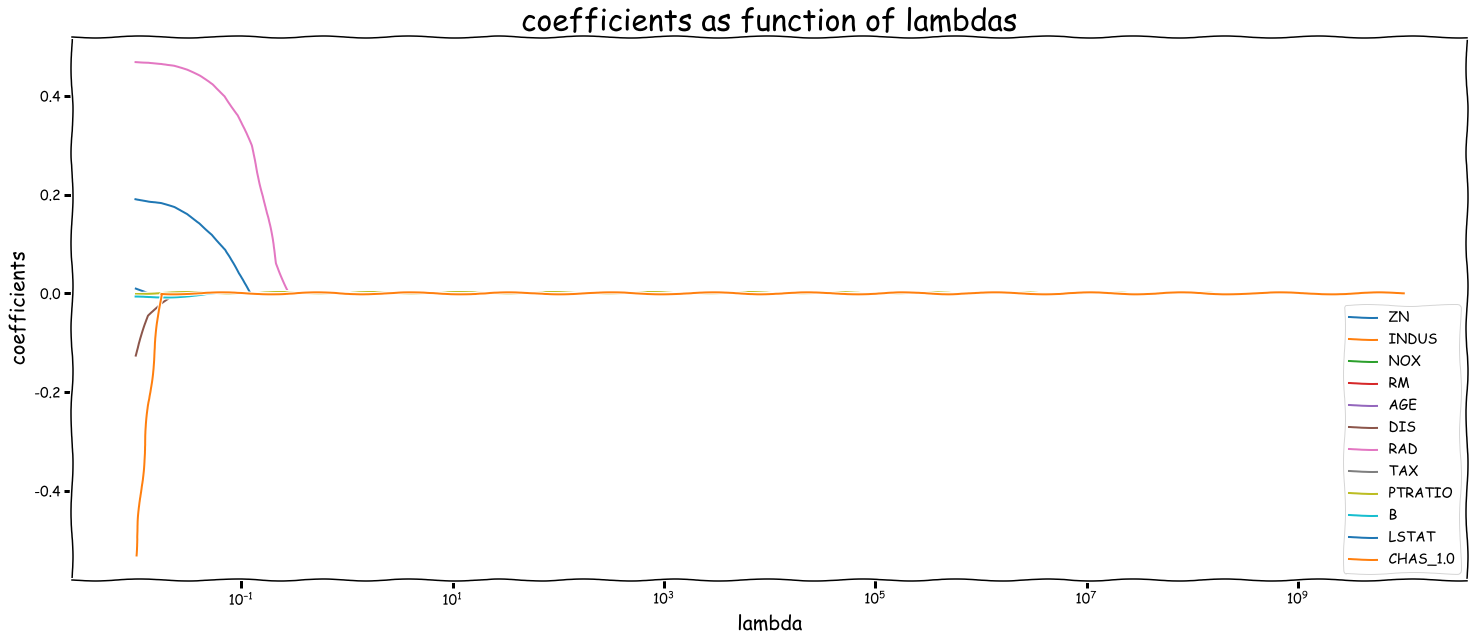

In [80]:
plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance. What is interesting however, is that different coefficients reduce to 0 with increasing $\lambda$. This suggests lasso can perform variable selection in addition to variance reduction.*

In [81]:
# splitting the Boston dataset into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [82]:
# lambda = 0
lasso0 = Lasso(alpha = 0, normalize = True).fit(X_train, y_train)
lassopred0 = lasso0.predict(scale(X_test))
lassocoefs0 = pd.Series(lasso0.coef_, index = X.columns)
lassointercept0 = pd.Series(lasso0.intercept_, index = ['Intercept'])
lassotable0 = pd.DataFrame(pd.concat([lassointercept0, lassocoefs0]))
lassotable0.columns = ['Coefficients']
lassotable0

,Coefficients
Intercept,11.015194
ZN,0.029621
INDUS,0.003303
NOX,-10.145412
RM,-0.350466
AGE,0.020438
DIS,-0.628266
RAD,0.529999
TAX,0.000045
PTRATIO,-0.096492


In [83]:
lassoerror0 = mean_squared_error(y_test, lassopred0)
lassoerror0

290.44245619639963

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression.*

**Selecting $\lambda$ through cross-validation**

In [84]:
lassocv = LassoCV(alphas = lambdas, normalize = True).fit(X_train, y_train)
lassocv.alpha_

0.013219411484660288

*Therefore, the $\lambda$ with the smallest cross-validation error is at 0.013219411484660288.*

In [85]:
# lambda = 0.013219411484660288
lasso0013 = Lasso(alpha = lassocv.alpha_, normalize = True).fit(X_train, y_train)
lassopred0013 = lasso0013.predict(scale(X_test))
lassocoefs0013 = pd.Series(lasso0013.coef_, index = X.columns)
lassointercept0013 = pd.Series(lasso0013.intercept_, index = ['Intercept'])
lassotable0013 = pd.DataFrame(pd.concat([lassointercept0013, lassocoefs0013]))
lassotable0013.columns = ['Coefficients']
lassotable0013

,Coefficients
Intercept,1.692065
ZN,0.000000
INDUS,0.000000
NOX,-0.000000
RM,-0.000000
AGE,0.001496
DIS,-0.203664
RAD,0.478376
TAX,0.000344
PTRATIO,0.000000


In [86]:
lassoerror0013 = mean_squared_error(y_test, lassopred0013)
lassoerror0013

77.65028240230212

**Ridge regression**

In [87]:
from sklearn.linear_model import Ridge, RidgeCV

In [88]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [90]:
ridge = Ridge(normalize = True)
coefs = []

for k in lambdas:
    ridgelm = ridge.set_params(alpha = k).fit(X, y)
    coefs.append(ridgelm.coef_)
    
np.shape(coefs)

(100, 12)

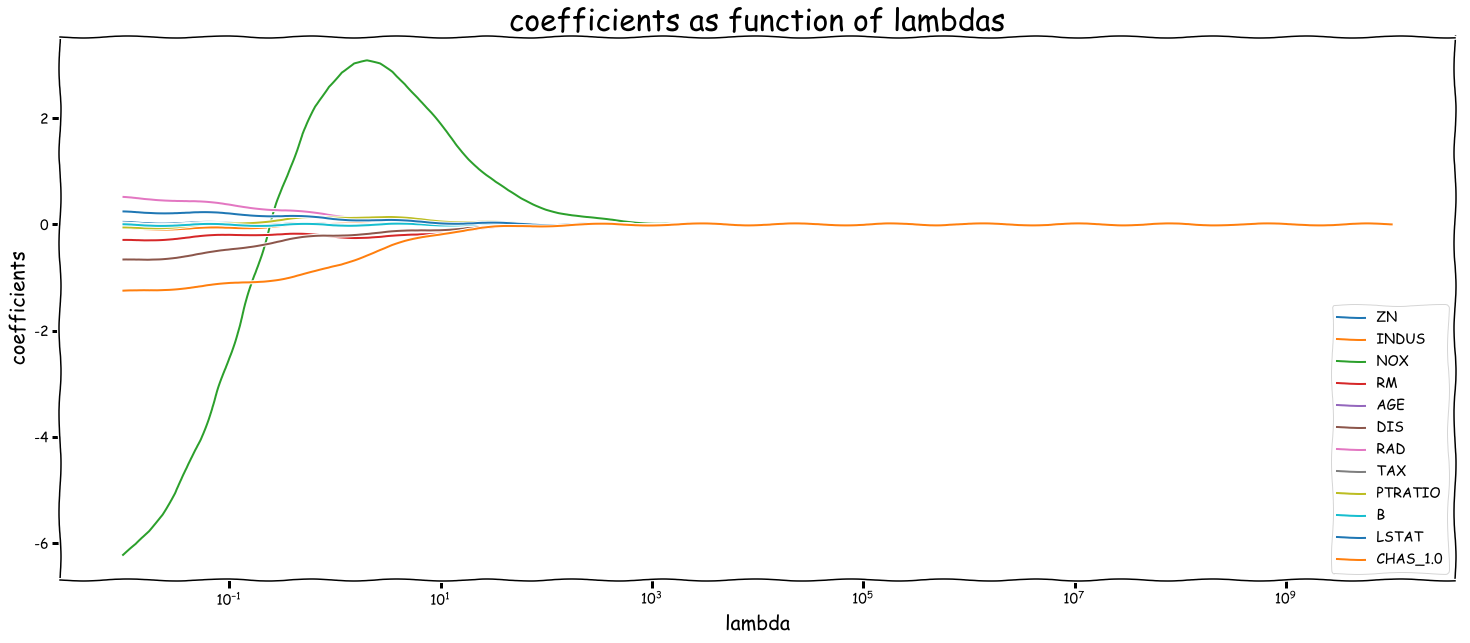

In [91]:
plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance.*

In [93]:
# lambda = 0
ridge0 = Ridge(alpha = 0, normalize = True).fit(X_train, y_train)
ridgepred0 = ridge0.predict(scale(X_test))
ridgecoefs0 = pd.Series(ridge0.coef_, index = X.columns)
ridgeintercept0 = pd.Series(ridge0.intercept_, index = ['Intercept'])
ridgetable0 = pd.DataFrame(pd.concat([ridgeintercept0, ridgecoefs0]))
ridgetable0.columns = ['Coefficients']
ridgetable0

,Coefficients
Intercept,11.015194
ZN,0.029621
INDUS,0.003303
NOX,-10.145412
RM,-0.350466
AGE,0.020438
DIS,-0.628266
RAD,0.529999
TAX,0.000045
PTRATIO,-0.096492


In [94]:
ridgeerror0 = mean_squared_error(y_test, ridgepred0)
ridgeerror0

290.4424561964043

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression. What's interesting to note that the coefficients and the MSE through ridge regression is the same as those through lasso
regression at $\lambda$=0.*

**Selecting $\lambda$ through cross-validation**

In [95]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True).fit(X_train, y_train)
ridgecv.alpha_

0.07054802310718632

*Therefore, the $\lambda$ with the smallest cross-validation error is at 0.07054802310718632.*

In [96]:
# lambda = 0.07054802310718632
ridge007 = Ridge(alpha = ridgecv.alpha_, normalize = True).fit(X_train, y_train)
ridgepred007 = ridge007.predict(scale(X_test))
ridgecoefs007 = pd.Series(ridge007.coef_, index = X.columns)
ridgeintercept007 = pd.Series(ridge007.intercept_, index = ['Intercept'])
ridgetable007 = pd.DataFrame(pd.concat([ridgeintercept007, ridgecoefs007]))
ridgetable007.columns = ['Coefficients']
ridgetable007

,Coefficients
Intercept,4.447414
ZN,0.019953
INDUS,-0.013467
NOX,-5.546289
RM,-0.092426
AGE,0.014702
DIS,-0.467869
RAD,0.385031
TAX,0.005612
PTRATIO,-0.007541


In [97]:
ridgeerror007 = mean_squared_error(y_test, ridgepred007)
ridgeerror007

141.86222009907513

**Principal components regression**

In [101]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF, cross_val_score
from sklearn.decomposition import PCA

In [99]:
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.273267,-0.184460,0.384155,0.112681,0.355416,-0.404261,-0.334192,0.411717,0.254714,0.296890,-0.033812,-0.076940
1,0.361522,0.068733,-0.004128,0.026487,0.008470,-0.141128,0.285788,0.683534,-0.373459,-0.226601,-0.190087,-0.260813
2,0.356776,0.226065,0.067369,-0.136598,0.130694,-0.194426,0.122717,0.060569,0.240232,-0.037411,0.815089,0.036291
3,-0.197660,0.356187,0.512526,-0.226941,-0.434097,0.071352,-0.326871,0.069490,-0.430876,0.014770,0.163685,0.044808
4,0.328519,0.273712,-0.120106,-0.184877,-0.014527,-0.044120,-0.606448,0.020083,0.373322,-0.418452,-0.286606,-0.039973


In [104]:
# selecting M, the number of components that give the lowest cross-validation error
n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1*cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)])

# calculating MSE for the 20 components through cross-validation
for i in np.arange(1, 21):
    mse = -1*cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,73.671451
1,51.521802
2,49.481650
3,45.296332
4,45.293421
5,45.480881
6,45.593616
7,45.404820
8,43.620780
9,43.679449


Text(0,0.5,'MSE')

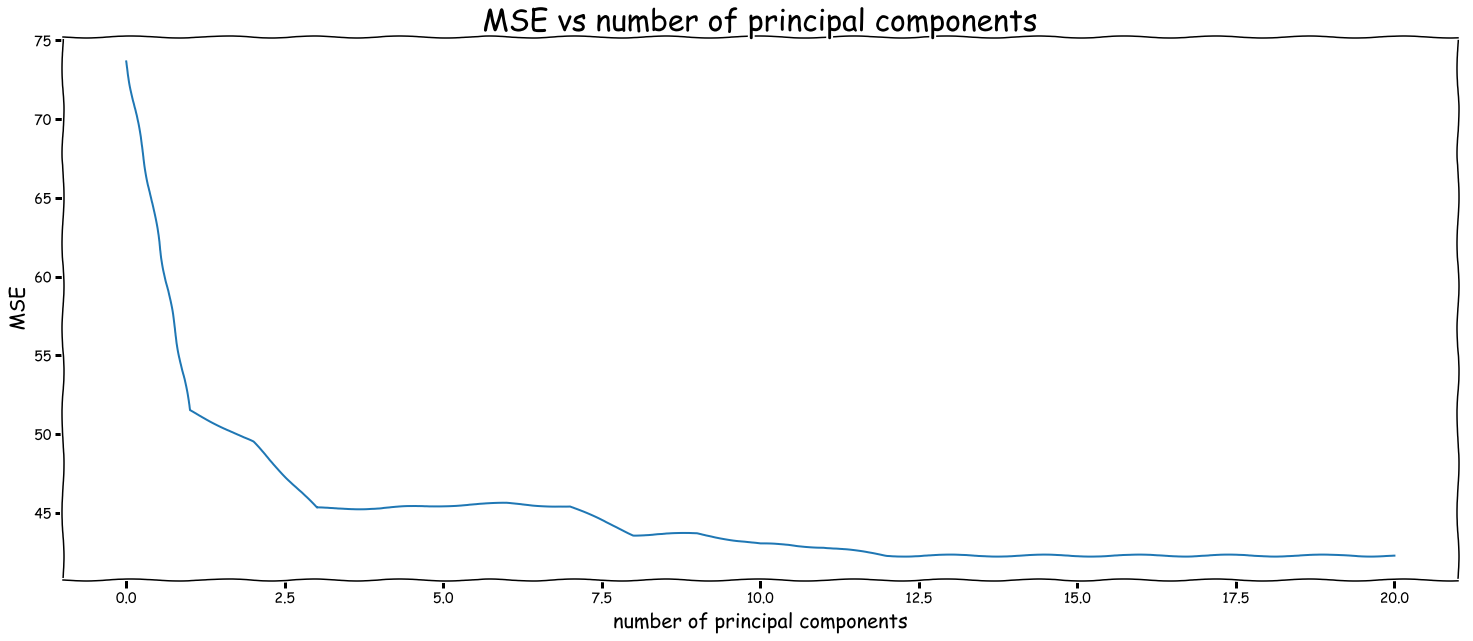

In [105]:
# plotting MSE for each component
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdf)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0,0.5,'explained variance ratio')

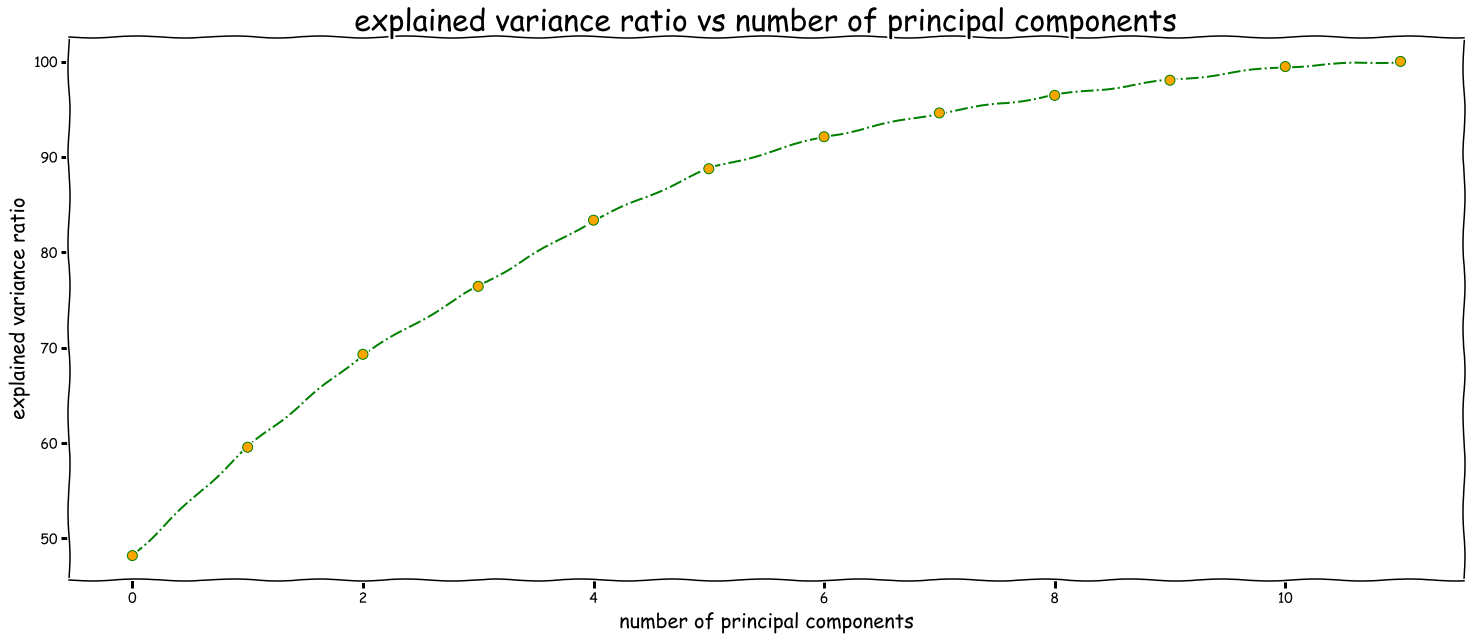

In [106]:
# plotting explained variance ratio
exp_var_ratio = pd.DataFrame(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*This suggests that I will get the lowest MSE at M=12 and flattens thereafter.*

In [109]:
# performing PCR on train and test data sets
pca_train = PCA()
X_scaled_train = pca_train.fit_transform(scale(X_train))
n = len(X_scaled_train)

lmtrain = LinearRegression()

kf10train = KF(n_splits=10, shuffle=True, random_state=42)
MSEdftrain= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
msetrain = -1*cross_val_score(lmtrain, np.ones((n,1)), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()    
MSEdftrain = MSEdftrain.append([msetrain])

# calculating MSE for the 20 components through cross-validation
for i in np.arange(1, 21):
    msetrain = -1*cross_val_score(lmtrain, X_scaled_train[:,:i], y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,67.544195
1,49.003044
2,47.006408
3,42.266007
4,42.341023
5,42.929289
6,44.493837
7,44.650873
8,44.072685
9,44.706856


Text(0,0.5,'MSE')

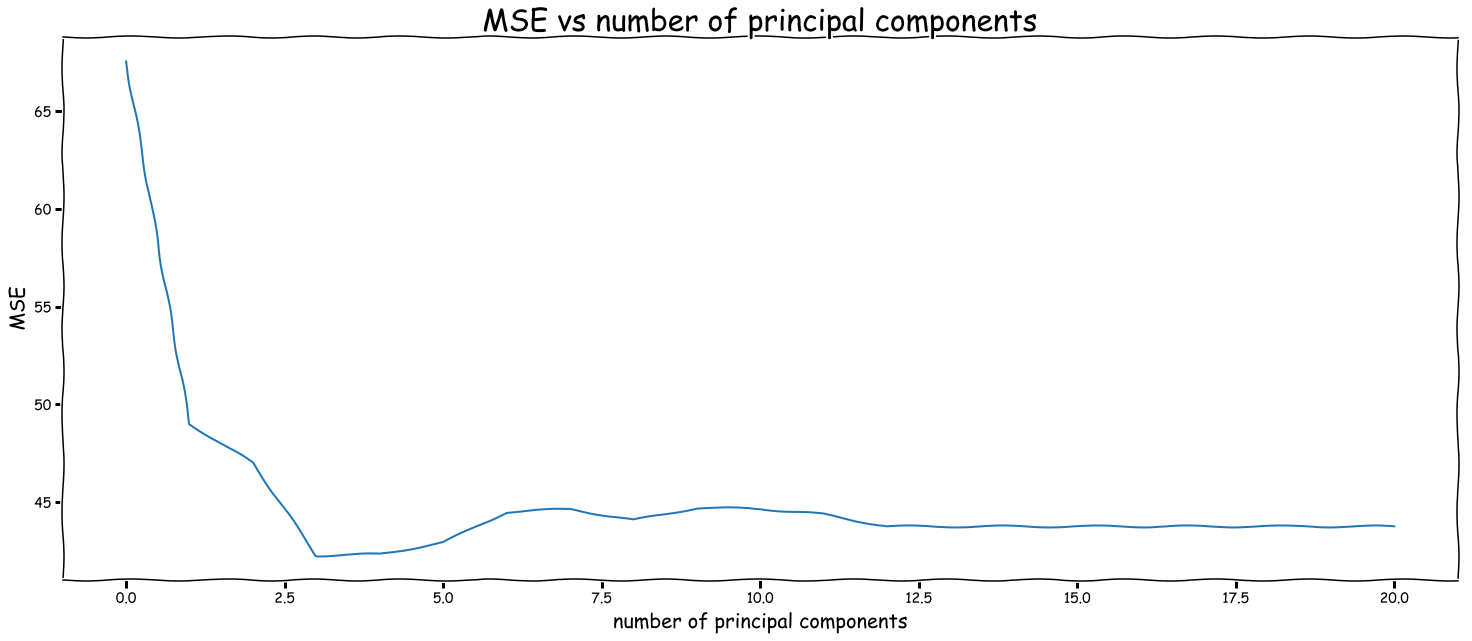

In [110]:
# plotting MSE for each component
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0,0.5,'explained variance ratio')

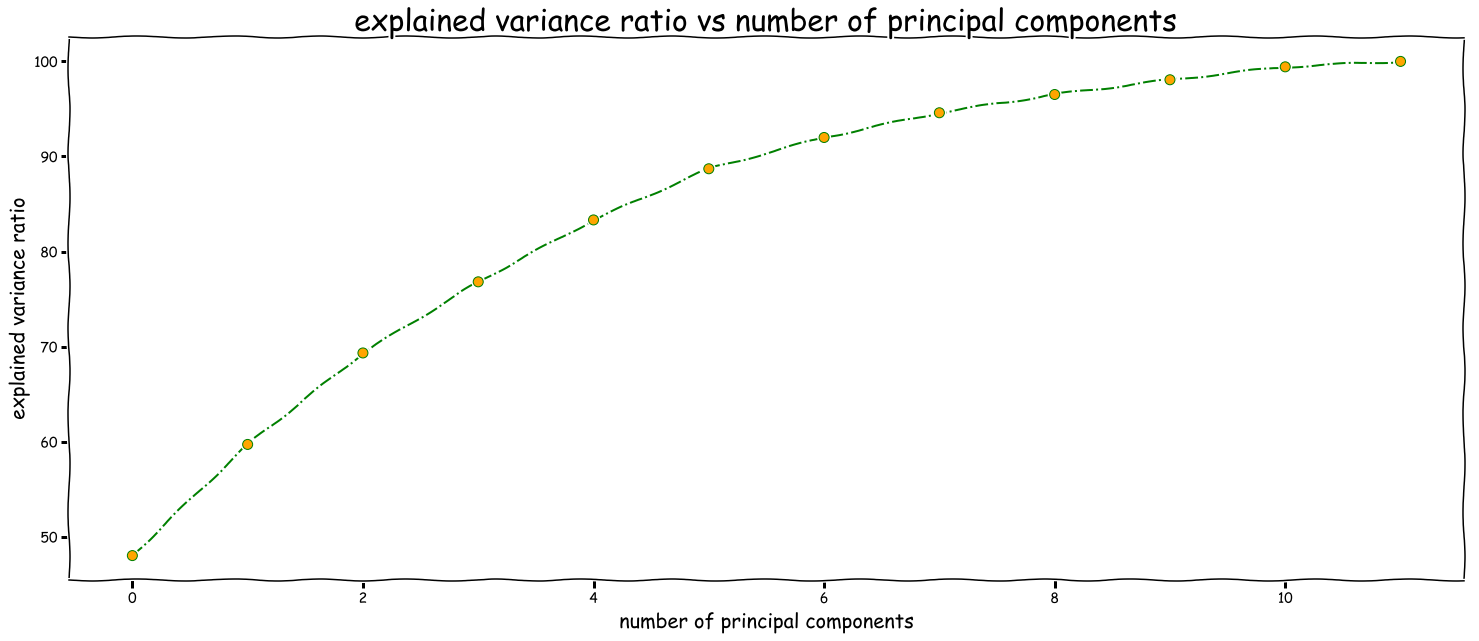

In [111]:
# plotting explained variance ratio
exp_var_ratio_scaled = pd.DataFrame(np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))
plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio_scaled, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*The two graphs above are quite interesting, The first graph suggests that the least MSE occurs at M=3. But, if we check the explained variance ratio, only  76.82% of the variance is explained by M=3 as comparied to 100% for M=12. So, it seems right that the ideal number of principal components is M=12.*

In [113]:
pca_test = PCA(n_components=12)
X_scaled_test = pca_test.fit_transform(scale(X_test))
pcrfit12 = LinearRegression().fit(X_scaled_train, y_train)
pcrpred12 = pcrfit12.predict(X_scaled_test)

pcrerror12 = mean_squared_error(y_test, pcrpred12)
pcrerror12

136.71143444923297

### 11.b. Selecting the best model

In [134]:
errordf = pd.DataFrame([lassoerror0013, ridgeerror007, pcrerror12], ['lasso', 'ridge', 'pcr'])
errordf.columns = ['error']
errordf

,error
lasso,77.650282
ridge,141.862220
pcr,136.711434


**Therefore, I will choose the lasso because it generates the least mean squared error on the test set.**

# 11.c. Number of features in lasso

In [136]:
lassotable0013

,Coefficients
Intercept,1.692065
ZN,0.000000
INDUS,0.000000
NOX,-0.000000
RM,-0.000000
AGE,0.001496
DIS,-0.203664
RAD,0.478376
TAX,0.000344
PTRATIO,0.000000


**No, it does not incorporate all features. Therefore, the equation with lasso will be $Y$ = $1.692065$ + $0.001496AGE$ - $0.203664DIS$ + $0.478376RAD$ + $0.000344TAX$ - $0.007527B$ + $0.041371LSTAT$ - $0.556786CHAS(=1)$.**

In [137]:
lassotable0

,Coefficients
Intercept,11.015194
ZN,0.029621
INDUS,0.003303
NOX,-10.145412
RM,-0.350466
AGE,0.020438
DIS,-0.628266
RAD,0.529999
TAX,0.000045
PTRATIO,-0.096492


**This is because rest of the features$\approx$0. Therefore, lasso punishes these features by reducing them to exactly 0.**